In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/movielens-20m-dataset/rating.csv
/kaggle/input/movielens-20m-dataset/link.csv
/kaggle/input/movielens-20m-dataset/genome_tags.csv
/kaggle/input/movielens-20m-dataset/genome_scores.csv
/kaggle/input/movielens-20m-dataset/tag.csv
/kaggle/input/movielens-20m-dataset/movie.csv


1Ô∏è‚É£ K√ºt√ºphaneler

In [2]:
# -----------------------------
# 1Ô∏è‚É£ K√ºt√ºphaneler
# -----------------------------
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori, association_rules
import warnings
warnings.filterwarnings('ignore')


Dataset Y√ºkleme ve ƒ∞lk Kontroller

In [3]:
# Kaggle'daki dosyalarƒ± listele
os.listdir('/kaggle/input/movielens-20m-dataset')

# Veri setlerini oku
ratings = pd.read_csv('/kaggle/input/movielens-20m-dataset/rating.csv')
movies = pd.read_csv('/kaggle/input/movielens-20m-dataset/movie.csv')

# ƒ∞lk 5 satƒ±rƒ± kontrol
print("Ratings ilk 5 satƒ±r:\n", ratings.head())
print("\nMovies ilk 5 satƒ±r:\n", movies.head())


Ratings ilk 5 satƒ±r:
    userId  movieId  rating            timestamp
0       1        2     3.5  2005-04-02 23:53:47
1       1       29     3.5  2005-04-02 23:31:16
2       1       32     3.5  2005-04-02 23:33:39
3       1       47     3.5  2005-04-02 23:32:07
4       1       50     3.5  2005-04-02 23:29:40

Movies ilk 5 satƒ±r:
    movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy  


Ratings veri seti (ilk 5 satƒ±r):
    userId  movieId  rating            timestamp
0       1        2     3.5  2005-04-02 23:53:47
1       1       29     3.5  2005-04-02 23:31:16
2       1       32     3.5  2005-04-02 23:33:39
3       1       47     3.5  2005-04-02 23:32:07
4       1       50     3.5  2005-04-02 23:29:40

Movies veri seti (ilk 5 satƒ±r):
    movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy  
Kullanƒ±cƒ± sayƒ±sƒ±: 138493
Film sayƒ±sƒ±: 267

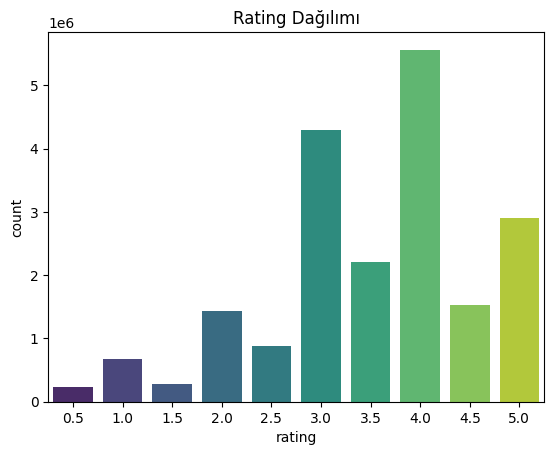

In [4]:
# ƒ∞lk 5 satƒ±r
print("Ratings veri seti (ilk 5 satƒ±r):\n", ratings.head())
print("\nMovies veri seti (ilk 5 satƒ±r):\n", movies.head())

# Ka√ß kullanƒ±cƒ± ve film var?
print(f"Kullanƒ±cƒ± sayƒ±sƒ±: {ratings['userId'].nunique()}")
print(f"Film sayƒ±sƒ±: {ratings['movieId'].nunique()}")

# Rating daƒüƒ±lƒ±mƒ±
sns.countplot(x='rating', data=ratings, palette='viridis')
plt.title("Rating Daƒüƒ±lƒ±mƒ±")
plt.show()


Liked Filtreleme ve Pop√ºler Filmler

In [5]:
# Ratings ve Movies merge
ratings_movies = pd.merge(ratings, movies, on="movieId")

# Rating >=4 olanlar liked olarak i≈üaretlendi
liked = ratings_movies[ratings_movies['rating'] >= 4].copy()

# En az 50 kez liked alan filmler
popular_movies = liked['movieId'].value_counts()[lambda x: x >= 50].index
liked = liked[liked['movieId'].isin(popular_movies)]

print(f"Filtre sonrasƒ± kullanƒ±cƒ± sayƒ±sƒ±: {liked['userId'].nunique()}")
print(f"Filtre sonrasƒ± film sayƒ±sƒ±: {liked['movieId'].nunique()}")


Filtre sonrasƒ± kullanƒ±cƒ± sayƒ±sƒ±: 138287
Filtre sonrasƒ± film sayƒ±sƒ±: 7345


One-Hot Matrisi Olu≈üturma

In [6]:
basket = liked.assign(val=1).pivot_table(
    index='userId', columns='movieId', values='val', aggfunc='max', fill_value=0
)

print("One-hot matrisi boyutu:", basket.shape)
basket.head()


One-hot matrisi boyutu: (138287, 7345)


movieId  1       2       3       4       5       6       7       8       \
userId                                                                    
1             0       0       0       0       0       0       0       0   
2             0       0       1       0       0       0       0       0   
3             1       0       0       0       0       0       0       0   
4             0       0       0       0       0       0       0       0   
5             0       0       0       0       0       0       0       0   

movieId  9       10      ...  115617  116161  116797  116823  117176  117533  \
userId                   ...                                                   
1             0       0  ...       0       0       0       0       0       0   
2             0       0  ...       0       0       0       0       0       0   
3             0       0  ...       0       0       0       0       0       0   
4             0       1  ...       0       0       0       0       0       0   
5             0       0  ...       0       0       0       0       0       0   

movieId  118696  118900  119141  119145  
userId                                   
1             0       0       0       0  
2             0       0       0       0  
3             0       0       0       0  
4             0       0       0       0  
5             0       0       0       0  

[5 rows x 7345 columns]

K√º√ß√ºk Subset G√∂rselle≈ütirme (Isƒ±l Harita)

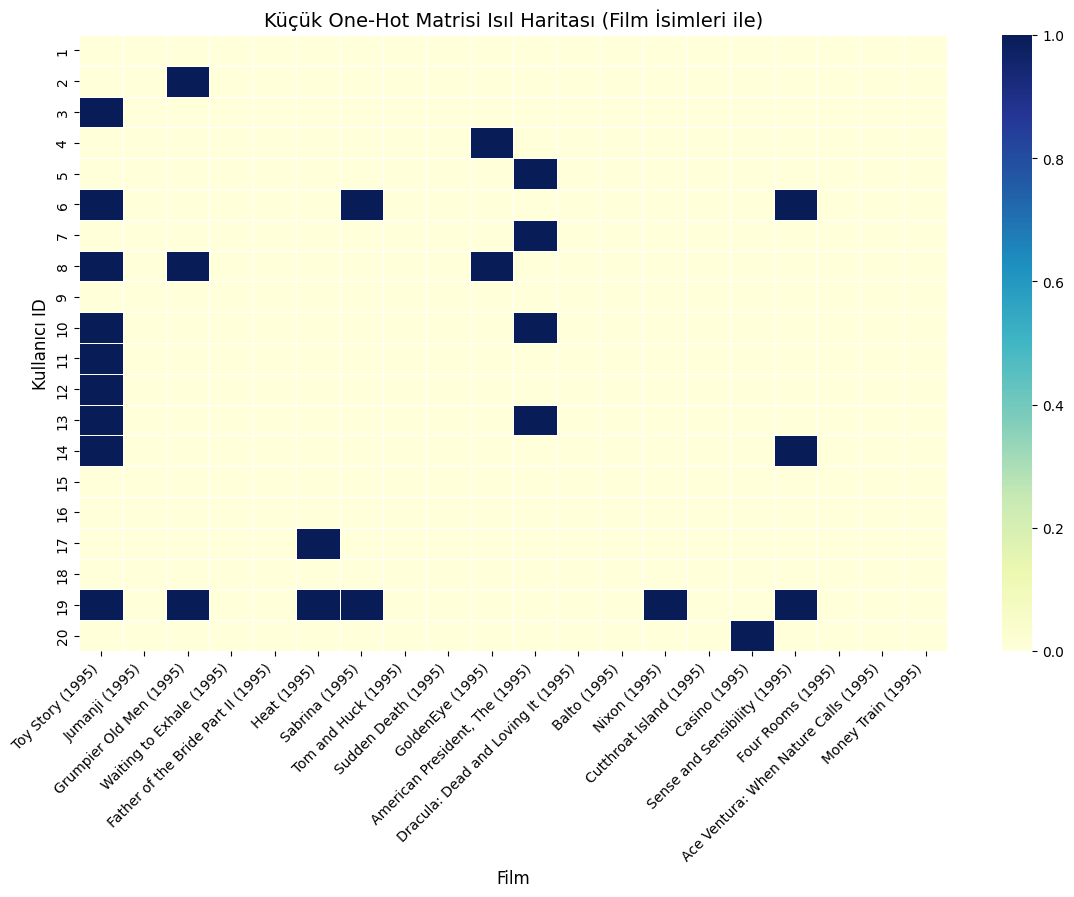

In [7]:
subset_basket = basket.iloc[:20, :20]  # hƒ±zlƒ± test i√ßin k√º√ß√ºk subset
movie_id_to_title = dict(zip(movies['movieId'], movies['title']))
subset_basket_named = subset_basket.rename(columns=movie_id_to_title)

plt.figure(figsize=(14,8))
sns.heatmap(subset_basket_named, cmap="YlGnBu", cbar=True, linewidths=0.5)
plt.title("K√º√ß√ºk One-Hot Matrisi Isƒ±l Haritasƒ± (Film ƒ∞simleri ile)", fontsize=14)
plt.xlabel("Film", fontsize=12)
plt.ylabel("Kullanƒ±cƒ± ID", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.show()


Apriori ve Association Rules (K√º√ß√ºk Subset)

In [8]:
subset_basket = basket.iloc[:500, :100]  # Hƒ±zlƒ± test i√ßin

# Sƒ±k itemset √ßƒ±kar
frequent_itemsets = apriori(subset_basket, min_support=0.01, use_colnames=True)

# Association rules olu≈ütur
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.25)
rules = rules[rules['lift'] > 1].sort_values(['confidence','lift'], ascending=False)

print("Top 5 Apriori kuralƒ±:\n")
print(rules.head())


Top 5 Apriori kuralƒ±:

       antecedents   consequents  antecedent support  consequent support  \
2472          (89)  (50, 11, 47)                0.01               0.018   
3739  (21, 36, 45)      (25, 11)                0.01               0.020   
3743  (25, 11, 45)      (36, 21)                0.01               0.024   
3736  (11, 36, 45)      (25, 21)                0.01               0.028   
3740  (25, 36, 45)      (11, 21)                0.01               0.032   

      support  confidence       lift  representativity  leverage  conviction  \
2472     0.01         1.0  55.555556               1.0   0.00982         inf   
3739     0.01         1.0  50.000000               1.0   0.00980         inf   
3743     0.01         1.0  41.666667               1.0   0.00976         inf   
3736     0.01         1.0  35.714286               1.0   0.00972         inf   
3740     0.01         1.0  31.250000               1.0   0.00968         inf   

      zhangs_metric   jaccard  certain

√ñneri Fonksiyonu (Film ƒ∞simleriyle)

In [9]:
def recommend_movie_names(rules_df, movie_id, movies_df, top_n=5):
    suggestions = rules_df[rules_df['antecedents'].apply(lambda x: movie_id in x)]['consequents']
    recommended_ids = set()
    for item in suggestions:
        recommended_ids.update(item)
    recommended_ids.discard(movie_id)
    recommended_ids = list(recommended_ids)[:top_n]
    recommended_titles = movies_df[movies_df['movieId'].isin(recommended_ids)]['title'].tolist()
    return recommended_titles


√ñrnek √ñneri

In [10]:
sample_movie_id = subset_basket.columns[0]  # ilk film ID
movie_title = movies[movies['movieId'] == sample_movie_id]['title'].values[0]

print(f"Kullanƒ±cƒ± '{movie_title}' filmini izlediyse, √∂nerilen filmler:")
print(recommend_movie_names(rules, sample_movie_id, movies, top_n=5))


Kullanƒ±cƒ± 'Toy Story (1995)' filmini izlediyse, √∂nerilen filmler:
['Heat (1995)', 'Sabrina (1995)', 'GoldenEye (1995)', 'Friday (1995)', 'From Dusk Till Dawn (1996)']


Bir sonraki adƒ±mda bunu yapabiliriz:

Top kurallarƒ± (√∂rn. confidence ve lift‚Äôe g√∂re sƒ±ralanmƒ±≈ü ilk 20-50 kural) alacaƒüƒ±z,

Network grafiƒüi olu≈üturacaƒüƒ±z: daireler filmleri, oklar kurallarƒ± g√∂sterecek,

Daire boyutlarƒ± veya renkleri ile support, ok kalƒ±nlƒ±ƒüƒ± veya renkleri ile confidence/lift deƒüerlerini g√∂rselle≈ütireceƒüiz.

B√∂ylece Apriori kurallarƒ±nƒ± hem okunabilir hem de g√∂rselle≈ütirilmi≈ü bir ≈üekilde sunabiliriz.

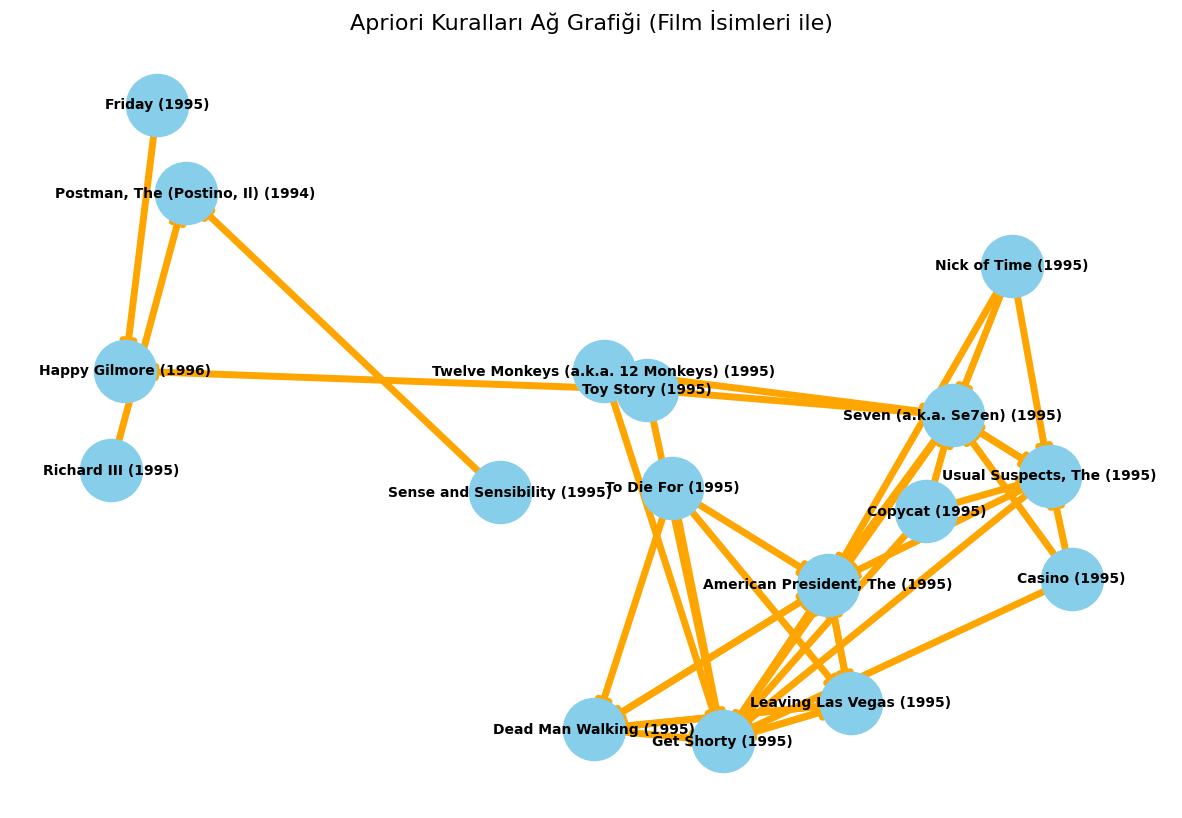

In [11]:
import networkx as nx
import matplotlib.pyplot as plt

# Top 20 kuralƒ± al
top_rules = rules.sort_values(['confidence','lift'], ascending=False).head(20)

G = nx.DiGraph()
for _, row in top_rules.iterrows():
    for a in row['antecedents']:
        for c in row['consequents']:
            G.add_edge(movie_id_to_title[a], movie_id_to_title[c], weight=row['confidence'])

plt.figure(figsize=(15,10))
pos = nx.spring_layout(G, k=1)

nx.draw_networkx_nodes(G, pos, node_size=2000, node_color='skyblue')
nx.draw_networkx_labels(G, pos, font_size=10, font_weight='bold')

edges = G.edges(data=True)
nx.draw_networkx_edges(
    G, pos, edgelist=edges,
    arrowstyle='-|>', arrowsize=20,
    width=[d['weight']*5 for (_,_,d) in edges],
    edge_color='orange'
)

plt.title("Apriori Kurallarƒ± Aƒü Grafiƒüi (Film ƒ∞simleri ile)", fontsize=16)
plt.axis('off')
plt.show()


bunu top 50 kuralla daha detaylƒ± ve okunaklƒ± h√¢le getireyim

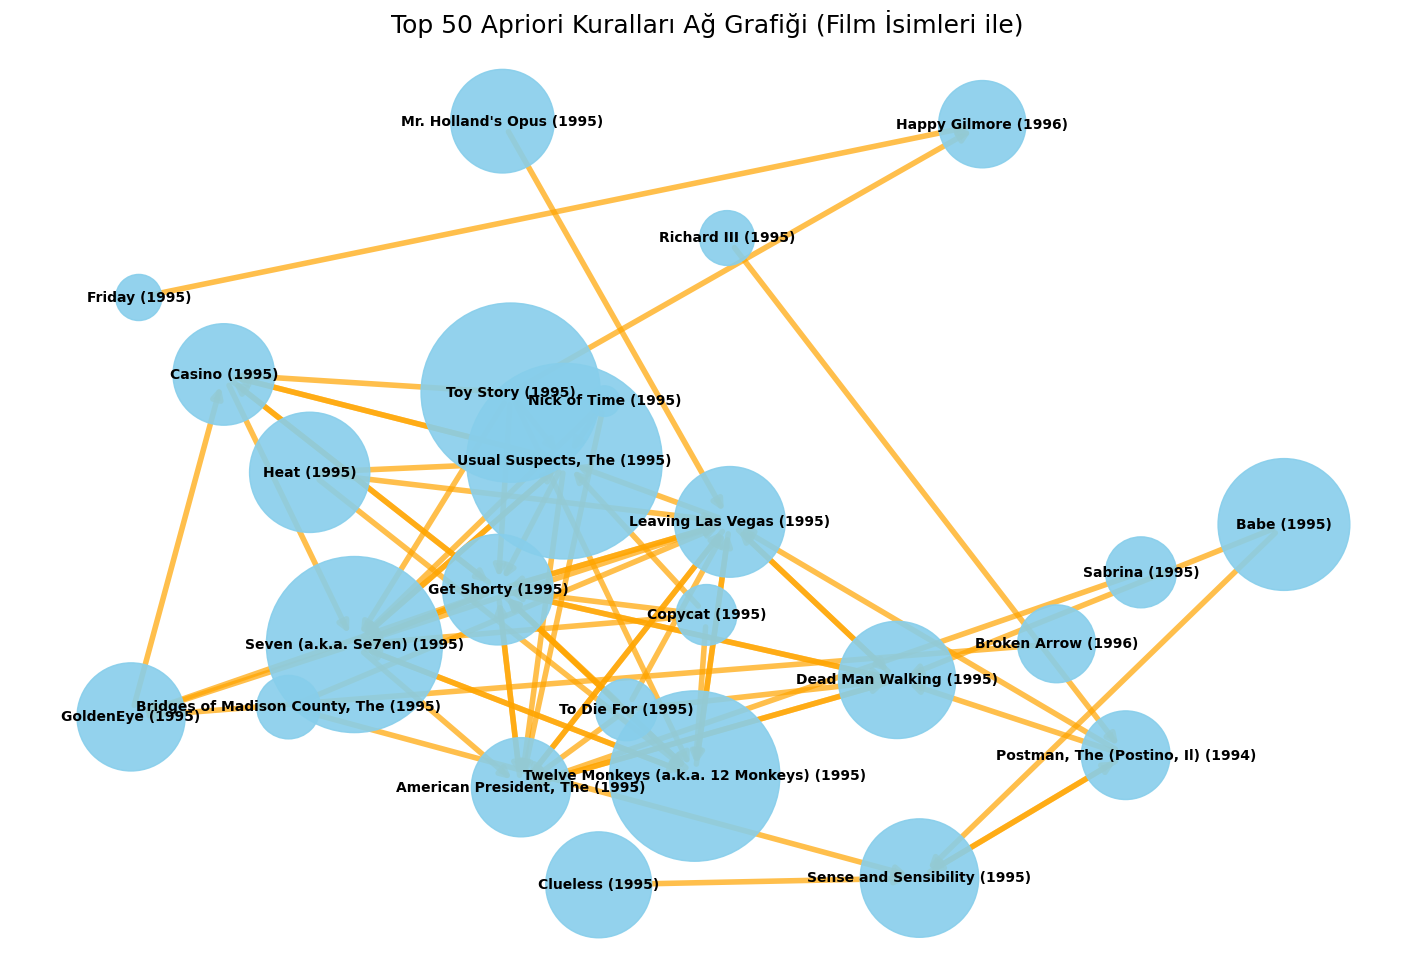

In [12]:
import networkx as nx
import matplotlib.pyplot as plt

# Top 50 kuralƒ± al
top_rules = rules.sort_values(['confidence','lift'], ascending=False).head(50)

# Node boyutu i√ßin film support deƒüerlerini al
support_dict = {movie_id_to_title[i]: basket[i].sum() for i in basket.columns if i in movie_id_to_title}

# Network grafiƒüi olu≈ütur
G = nx.DiGraph()

for _, row in top_rules.iterrows():
    for a in row['antecedents']:
        for c in row['consequents']:
            G.add_edge(movie_id_to_title[a], movie_id_to_title[c], weight=row['confidence'])

plt.figure(figsize=(18,12))
pos = nx.spring_layout(G, k=1, seed=42)  # seed ile layout sabitlenebilir

# D√ºƒü√ºmler ve node boyutlarƒ± support ile
node_sizes = [support_dict.get(node, 50) * 0.5 for node in G.nodes()]
nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color='skyblue', alpha=0.9)
nx.draw_networkx_labels(G, pos, font_size=10, font_weight='bold')

# Oklar ve kalƒ±nlƒ±klarƒ± confidence ile
edges = G.edges(data=True)
nx.draw_networkx_edges(
    G, pos, edgelist=edges,
    arrowstyle='-|>', arrowsize=15,
    width=[d['weight']*4 for (_,_,d) in edges],
    edge_color='orange', alpha=0.7
)

plt.title("Top 50 Apriori Kurallarƒ± Aƒü Grafiƒüi (Film ƒ∞simleri ile)", fontsize=18)
plt.axis('off')
plt.show()


eksik veri var mƒ± hƒ±zlƒ±ca g√∂zden ge√ßirdim:

In [13]:
# Ratings veri seti
print("Ratings veri setindeki eksik deƒüerler:")
print(ratings.isnull().sum())

# Movies veri seti
print("\nMovies veri setindeki eksik deƒüerler:")
print(movies.isnull().sum())

# Birle≈ütirilmi≈ü veri seti (ratings + movies)
ratings_movies = pd.merge(ratings, movies, on="movieId")
print("\nBirle≈ütirilmi≈ü veri setindeki eksik deƒüerler:")
print(ratings_movies.isnull().sum())


Ratings veri setindeki eksik deƒüerler:
userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

Movies veri setindeki eksik deƒüerler:
movieId    0
title      0
genres     0
dtype: int64

Birle≈ütirilmi≈ü veri setindeki eksik deƒüerler:
userId       0
movieId      0
rating       0
timestamp    0
title        0
genres       0
dtype: int64


≈ûu ana kadar:

Dataset okundu ve birle≈ütirildi (ratings + movies).

Eksik veri kontrol√º yapƒ±ldƒ± (sorun yok).

Liked filtrelemesi ve pop√ºler film filtrelemesi uygulandƒ±.

One-hot matrisi olu≈üturuldu (basket).

K√º√ß√ºk subset ile Apriori testi yapƒ±ldƒ± ve top kurallar incelendi.

Network grafiƒüi ile kurallarƒ±n g√∂rselle≈ütirmesi tamamlandƒ±.

Interaktif network grafiƒüi hazƒ±rlandƒ± (Plotly).

Adƒ±m 1: Collaborative Filtering i√ßin kullanƒ±cƒ±-film pivot tablosu

Apriori kƒ±smƒ± zaten kurallara dayalƒ± √∂neri saƒülƒ±yor. ≈ûimdi CF i√ßin kullanƒ±cƒ±-film matrisini olu≈üturalƒ±m:


**MovieLens 20M dataset‚Äôinde:~138.000 kullanƒ±cƒ±~27.000 film‚Üí Pivot tablosu 138k √ó 27k h√ºcre olu≈üturacak, bu hafƒ±za ve performans problemi yaratƒ±r.Bunu √ß√∂zmek i√ßin k√º√ß√ºk bir subset ile test yapabiliriz:**


In [14]:
import pandas as pd

# Dosyalarƒ± oku
ratings = pd.read_csv("/kaggle/input/movielens-20m-dataset/rating.csv")
movies = pd.read_csv("/kaggle/input/movielens-20m-dataset/movie.csv")

# Birle≈ütir
ratings_movies = pd.merge(ratings, movies, on="movieId")

# ƒ∞lk 5 satƒ±ra g√∂z atalƒ±m
ratings_movies.head()


userId  movieId  rating            timestamp  \
0       1        2     3.5  2005-04-02 23:53:47   
1       1       29     3.5  2005-04-02 23:31:16   
2       1       32     3.5  2005-04-02 23:33:39   
3       1       47     3.5  2005-04-02 23:32:07   
4       1       50     3.5  2005-04-02 23:29:40   

                                               title  \
0                                     Jumanji (1995)   
1  City of Lost Children, The (Cit√© des enfants p...   
2          Twelve Monkeys (a.k.a. 12 Monkeys) (1995)   
3                        Seven (a.k.a. Se7en) (1995)   
4                         Usual Suspects, The (1995)   

                                   genres  
0              Adventure|Children|Fantasy  
1  Adventure|Drama|Fantasy|Mystery|Sci-Fi  
2                 Mystery|Sci-Fi|Thriller  
3                        Mystery|Thriller  
4                  Crime|Mystery|Thriller

2Ô∏è‚É£ Subset ile pivot tablosu olu≈ütur

In [15]:
# √ñrnek subset: ilk 1000 kullanƒ±cƒ± ve en pop√ºler 500 film
popular_movies = ratings_movies['movieId'].value_counts().head(500).index
subset = ratings_movies[ratings_movies['movieId'].isin(popular_movies)]
subset = subset[subset['userId'] <= 1000]

# Pivot tablosu
user_movie_matrix = subset.pivot_table(
    index='userId',
    columns='movieId',
    values='rating',
    fill_value=0
)

print("Subset pivot tablosu boyutu:", user_movie_matrix.shape)
user_movie_matrix.head()


Subset pivot tablosu boyutu: (991, 500)


movieId  1      2      3      5      6      7      10     11     16     17     \
userId                                                                          
1          0.0    3.5    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
2          0.0    0.0    4.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
3          4.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
4          0.0    0.0    0.0    0.0    3.0    0.0    4.0    0.0    0.0    0.0   
5          0.0    3.0    0.0    0.0    0.0    0.0    0.0    5.0    0.0    3.0   

movieId  ...  54286  55820  56367  58559  59315  60069  68157  68954  72998  \
userId   ...                                                                  
1        ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
2        ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
3        ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
4        ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
5        ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   

movieId  79132  
userId          
1          0.0  
2          0.0  
3          0.0  
4          0.0  
5          0.0  

[5 rows x 500 columns]

Apriori ile √ßƒ±karƒ±lan kurallarƒ± aƒü grafiƒüi ≈üeklinde g√∂rselle≈ütirebiliriz:

D√ºƒü√ºmler (nodes) ‚Üí Filmler

Oklar / kenarlar (edges) ‚Üí Kurallarƒ± temsil eder (X ‚Üí Y)

D√ºƒü√ºm b√ºy√ºkl√ºƒü√º ‚Üí pop√ºlerlik (ka√ß kez ge√ßtiƒüi)

Kenar kalƒ±nlƒ±ƒüƒ± ‚Üí kuralƒ±n lift deƒüeri

One-hot pivot tablosu i√ßin k√º√ß√ºk subset olu≈ütur

In [16]:
# En pop√ºler 20 film
popular_movies = ratings_movies['movieId'].value_counts().head(20).index

# ƒ∞lk 20 kullanƒ±cƒ±
subset = ratings_movies[ratings_movies['movieId'].isin(popular_movies)]
subset = subset[subset['userId'] <= 20]

# Kullanƒ±cƒ± √ó Film pivot tablosu (rating >=4 ise 1, deƒüilse 0)
subset_small = subset.pivot_table(
    index='userId',
    columns='movieId',
    values='rating',
    fill_value=0
).apply(lambda col: col.map(lambda x: 1 if x >= 4 else 0))


O zaman Apriori kurallarƒ±na dayalƒ± √∂neri fonksiyonunu yazalƒ±m ve √∂rnek g√∂sterelim.

In [17]:
#√ñneri Fonksiyonu (Film ID ‚Üí Film ƒ∞smi ile)
def recommend_movies(rules_df, movie_id, movies_df, top_n=5):
    """
    Kurallara dayalƒ± √∂neri fonksiyonu.
    rules_df: Apriori ile elde edilen kurallar
    movie_id: Kullanƒ±cƒ±nƒ±n izlediƒüi film ID
    movies_df: movieId -> title mapping i√ßin
    top_n: √ñnerilecek film sayƒ±sƒ±
    """
    # Kurallarƒ±n antecedent kƒ±smƒ±nda movie_id olanlarƒ± se√ß
    recs = rules_df[rules_df['antecedents'].apply(lambda x: movie_id in x)]
    
    # confidence ve lift‚Äôe g√∂re sƒ±rala
    recs = recs.sort_values(['confidence', 'lift'], ascending=False)
    
    # En √ßok √∂nerilen filmID‚Äôlerini al
    recommended_ids = []
    for consequents in recs['consequents']:
        recommended_ids.extend(list(consequents))
    
    # Film ID‚Äôlerini isimlere √ßevir ve tekrar edenleri kaldƒ±r
    recommended_titles = [movies_df[movies_df['movieId']==mid]['title'].values[0] 
                          for mid in recommended_ids if mid != movie_id]
    
    # Tekrarlardan temizle ve top_n al
    return recommended_titles[:top_n]


√ñrnek Kullanƒ±m

In [18]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules

# K√º√ß√ºk subset (ilk 20 kullanƒ±cƒ± ve 20 pop√ºler film)
popular_movies = ratings_movies['movieId'].value_counts().head(20).index
subset = ratings_movies[ratings_movies['movieId'].isin(popular_movies)]
subset = subset[subset['userId'] <= 20]

subset_small = subset.pivot_table(
    index='userId',
    columns='movieId',
    values='rating',
    fill_value=0
).apply(lambda col: col.map(lambda x: 1 if x >= 4 else 0))

# Apriori
frequent_itemsets = apriori(subset_small, min_support=0.2, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.6)

# √ñneri fonksiyonu
def recommend_movies(rules_df, movie_id, movies_df, top_n=5):
    recs = rules_df[rules_df['antecedents'].apply(lambda x: movie_id in x)]
    recs = recs.sort_values(['confidence','lift'], ascending=False)
    recommended_ids = []
    for consequents in recs['consequents']:
        recommended_ids.extend(list(consequents))
    recommended_titles = [movies_df[movies_df['movieId']==mid]['title'].values[0] 
                          for mid in recommended_ids if mid != movie_id]
    return recommended_titles[:top_n]

# √ñrnek √∂neri
sample_movie_id = subset_small.columns[0]
movie_title = movies[movies['movieId']==sample_movie_id]['title'].values[0]

print(f"Kullanƒ±cƒ± '{movie_title}' filmini izlediyse, √∂nerilen filmler:")
print(recommend_movies(rules, sample_movie_id, movies, top_n=5))


Kullanƒ±cƒ± 'Toy Story (1995)' filmini izlediyse, √∂nerilen filmler:
['Terminator 2: Judgment Day (1991)', "Schindler's List (1993)", 'Braveheart (1995)', "Schindler's List (1993)", 'Terminator 2: Judgment Day (1991)']


Top 50 Apriori kuralƒ± ile network grafiƒüi olu≈üturalƒ±m. K√º√ß√ºk subset deƒüil, biraz daha b√ºy√ºk bir veri kullanacaƒüƒ±z ama yine de g√∂rselle≈ütirme rahat olmalƒ±.

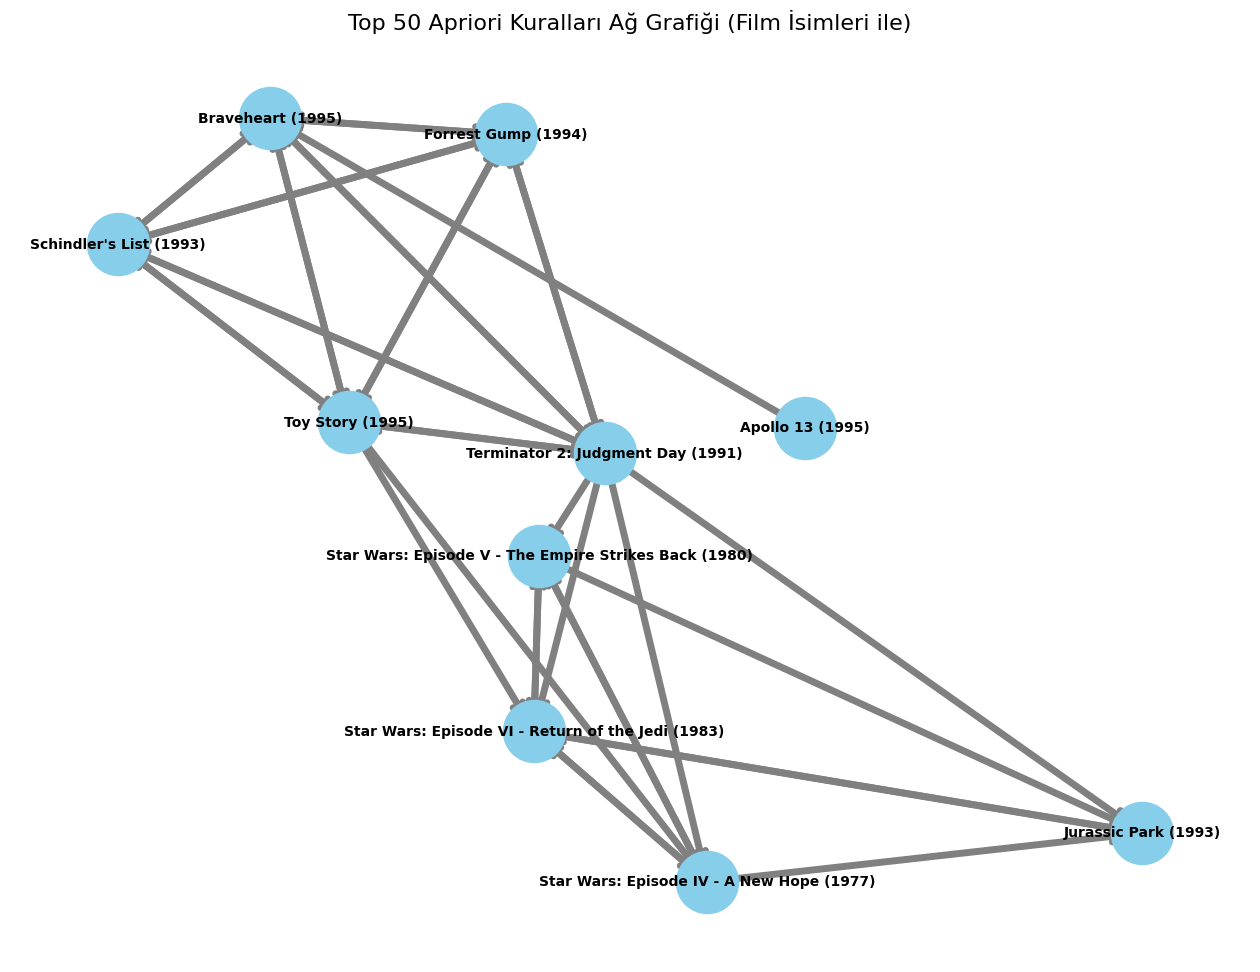

In [19]:
import networkx as nx
import matplotlib.pyplot as plt

# Top 50 kural
top_rules = rules.sort_values(['confidence','lift'], ascending=False).head(50)

# Directed graph olu≈ütur
G = nx.DiGraph()

# D√ºƒü√ºmler ve kenarlar
for idx, row in top_rules.iterrows():
    antecedents = [movies[movies['movieId']==aid]['title'].values[0] for aid in row['antecedents']]
    consequents = [movies[movies['movieId']==cid]['title'].values[0] for cid in row['consequents']]
    
    for a in antecedents:
        for c in consequents:
            G.add_edge(a, c, weight=row['confidence'])

# G√∂rselle≈ütirme
plt.figure(figsize=(16,12))
pos = nx.spring_layout(G, k=1, seed=42)

# Kenar kalƒ±nlƒ±klarƒ± confidence ile
edges = G.edges()
weights = [G[u][v]['weight']*5 for u,v in edges]

nx.draw_networkx_nodes(G, pos, node_size=2000, node_color='skyblue')
nx.draw_networkx_edges(G, pos, edgelist=edges, width=weights, arrowstyle='->', arrowsize=20, edge_color='gray')
nx.draw_networkx_labels(G, pos, font_size=10, font_weight='bold')

plt.title("Top 50 Apriori Kurallarƒ± Aƒü Grafiƒüi (Film ƒ∞simleri ile)", fontsize=16)
plt.axis('off')
plt.show()


> √ñzetle: Bu aƒü grafiƒüi Apriori algoritmasƒ± ile √ßƒ±karƒ±lan birliktelik kurallarƒ±nƒ± g√∂rsel hale getiriyor. Kurallar ‚ÄúFilm A‚Äôyƒ± izleyenler genellikle Film B‚Äôyi de izliyor‚Äù mantƒ±ƒüƒ±nƒ± g√∂steriyor ve kullanƒ±cƒ±ya √∂neri sunmak i√ßin temel olu≈üturuyor.


O zaman ratings_movies √ºzerinden ‚Äúliked‚Äù filtreleme ve pop√ºler filmleri se√ßme adƒ±mƒ±nƒ± ekleyelim:

A√ßƒ±klama:

liked ‚Üí kullanƒ±cƒ±larƒ±n 4 ve √ºzeri puan verdiƒüi filmler.

popular_movies ‚Üí en az 50 kullanƒ±cƒ± tarafƒ±ndan beƒüenilen filmler.

Filtreleme sonrasƒ± liked veri seti daha y√∂netilebilir boyuta geliyor.

Bundan sonra One-hot matrisi ve Apriori adƒ±mƒ±na ge√ßebiliriz.

In [20]:
# -----------------------------
# 1Ô∏è‚É£ K√ºt√ºphaneler
# -----------------------------
import pandas as pd
import os
from mlxtend.frequent_patterns import apriori, association_rules

# -----------------------------
# 2Ô∏è‚É£ Dataset Kontrol ve Okuma
# -----------------------------
print("Dataset klas√∂r√ºndeki dosyalar:")
print(os.listdir('/kaggle/input/movielens-20m-dataset'))

# CSV'leri oku
ratings = pd.read_csv('/kaggle/input/movielens-20m-dataset/rating.csv')
movies = pd.read_csv('/kaggle/input/movielens-20m-dataset/movie.csv')

# Timestamp kolonunu datetime formatƒ±na √ßevir (string tarih)
ratings['timestamp'] = pd.to_datetime(ratings['timestamp'])

# -----------------------------
# 3Ô∏è‚É£ Ratings ve Movies Birle≈ütirme
# -----------------------------
ratings_movies = pd.merge(ratings, movies, on="movieId")
print("Ratings Movies birle≈üimi ilk 5 satƒ±r:\n")
print(ratings_movies.head())

# -----------------------------
# 4Ô∏è‚É£ Filtreleme
# -----------------------------
# 4 ve √ºzeri puan alanlar liked
liked = ratings_movies[ratings_movies["rating"] >= 4]

# En az 500 farklƒ± kullanƒ±cƒ± tarafƒ±ndan beƒüenilen filmler
popular_movies = liked.groupby("movieId").filter(lambda x: len(x) >= 500)

print("Filtre sonrasƒ± kullanƒ±cƒ± sayƒ±sƒ±:", popular_movies["userId"].nunique())
print("Filtre sonrasƒ± film sayƒ±sƒ±:", popular_movies["movieId"].nunique())

# -----------------------------
# 5Ô∏è‚É£ One-Hot Matris
# -----------------------------
basket = (popular_movies
          .groupby(['userId', 'movieId'])['rating']
          .count().unstack().reset_index()
          .fillna(0).set_index('userId'))

# 0-1 d√∂n√º≈ü√ºm√º 
basket = (basket > 0)

# Kullanƒ±cƒ± sayƒ±sƒ±nƒ± sƒ±nƒ±rlayalƒ±m (ilk 20.000 kullanƒ±cƒ±)
basket = basket.iloc[:20000, :]

print("One-hot matrisi boyutu:", basket.shape)

# -----------------------------
# 6Ô∏è‚É£ Apriori Analizi
# -----------------------------
frequent_itemsets = apriori(
    basket,
    min_support=0.05,
    use_colnames=True,
    max_len=2
)

print("Bulunan sƒ±k √∂ƒüe seti sayƒ±sƒ±:", len(frequent_itemsets))

# -----------------------------
# 7Ô∏è‚É£ Kurallar
# -----------------------------
rules = association_rules(
    frequent_itemsets,
    metric="lift",
    min_threshold=1.0
)

rules = rules.sort_values("lift", ascending=False)
print("Kural sayƒ±sƒ±:", len(rules))
print("Top 10 kural:")
print(rules.head(10))

# -----------------------------
# 8Ô∏è‚É£ Kullanƒ±cƒ± Bazlƒ± √ñneri Fonksiyonu
# -----------------------------
def recommend_movies(user_id, basket, rules, top_n=50):
    watched = set(basket.loc[user_id][basket.loc[user_id] == 1].index)
    user_rules = rules[rules['antecedents'].apply(lambda x: len(x & watched) > 0)]

    recs = []
    for _, row in user_rules.iterrows():
        for movie in row['consequents']:
            if movie not in watched:
                recs.append((movie, row['confidence'], row['lift']))

    recs_df = pd.DataFrame(recs, columns=['movieId', 'confidence', 'lift'])
    recs_df = recs_df.sort_values(['confidence', 'lift'], ascending=False).drop_duplicates(subset=['movieId'])
    recs_df = recs_df.merge(movies[['movieId', 'title']], on='movieId', how='left')

    return recs_df.head(top_n)

# -----------------------------
# 9Ô∏è‚É£ √ñrnek Kullanƒ±cƒ± √ñnerisi
# -----------------------------
user_id = 1
recommendations = recommend_movies(user_id, basket, rules, top_n=50)
recommendations

Dataset klas√∂r√ºndeki dosyalar:
['rating.csv', 'link.csv', 'genome_tags.csv', 'genome_scores.csv', 'tag.csv', 'movie.csv']
Ratings Movies birle≈üimi ilk 5 satƒ±r:

   userId  movieId  rating           timestamp  \
0       1        2     3.5 2005-04-02 23:53:47   
1       1       29     3.5 2005-04-02 23:31:16   
2       1       32     3.5 2005-04-02 23:33:39   
3       1       47     3.5 2005-04-02 23:32:07   
4       1       50     3.5 2005-04-02 23:29:40   

                                               title  \
0                                     Jumanji (1995)   
1  City of Lost Children, The (Cit√© des enfants p...   
2          Twelve Monkeys (a.k.a. 12 Monkeys) (1995)   
3                        Seven (a.k.a. Se7en) (1995)   
4                         Usual Suspects, The (1995)   

                                   genres  
0              Adventure|Children|Fantasy  
1  Adventure|Drama|Fantasy|Mystery|Sci-Fi  
2                 Mystery|Sci-Fi|Thriller  
3                   

movieId  confidence      lift  \
0      6874    0.850882  8.012073   
1      1210    0.733333  3.006080   
2      2571    0.721456  2.473281   
3       589    0.719741  2.753410   
4       593    0.714558  1.959035   
5        50    0.674257  2.323021   
6      1136    0.646680  3.394643   
7       858    0.645264  2.558540   
8      2858    0.612362  2.450921   
9      4226    0.608384  3.513623   
10       47    0.605074  2.575333   
11     1270    0.597356  2.941193   
12      356    0.592674  1.695048   
13      608    0.579343  2.398438   
14     6377    0.578050  5.217058   
15     1193    0.559155  3.145738   
16      110    0.557682  2.004607   
17     4886    0.552477  5.033962   
18     1291    0.543894  3.327585   
19        1    0.537560  2.230539   
20     1197    0.536343  2.849100   
21      527    0.536150  1.752984   
22      457    0.518950  2.026359   
23     2028    0.507275  2.600079   
24      904    0.499531  4.640321   
25     1221    0.490141  3.050036   
26      912    0.484038  3.377792   
27      750    0.483568  3.533563   
28       32    0.480825  2.235355   
29     1089    0.480344  3.172682   
30     3578    0.477056  2.893003   
31     1206    0.463964  3.621889   
32      480    0.460879  1.964531   
33     4963    0.445887  4.272999   
34     1213    0.443079  2.854893   
35      924    0.439053  3.491477   
36     1208    0.437756  3.402689   
37     1222    0.428337  3.700539   
38     1265    0.422544  2.740233   
39     2329    0.410599  3.095355   
40     1704    0.387295  2.593201   
41     1617    0.383136  2.584392   
42      919    0.381565  3.269622   
43     1580    0.375731  2.902522   
44     2716    0.373884  2.962627   
45      150    0.371919  1.671920   
46    58559    0.369414  3.059328   
47    33794    0.366512  3.809895   
48     7361    0.359759  2.907141   
49     4973    0.358387  2.565401   

                                                title  
0                            Kill Bill: Vol. 1 (2003)  
1   Star Wars: Episode VI - Return of the Jedi (1983)  
2                                  Matrix, The (1999)  
3                   Terminator 2: Judgment Day (1991)  
4                    Silence of the Lambs, The (1991)  
5                          Usual Suspects, The (1995)  
6              Monty Python and the Holy Grail (1975)  
7                               Godfather, The (1972)  
8                              American Beauty (1999)  
9                                      Memento (2000)  
10                        Seven (a.k.a. Se7en) (1995)  
11                          Back to the Future (1985)  
12                                Forrest Gump (1994)  
13                                       Fargo (1996)  
14                                Finding Nemo (2003)  
15             One Flew Over the Cuckoo's Nest (1975)  
16                                  Braveheart (1995)  
17                              Monsters, Inc. (2001)  
18          Indiana Jones and the Last Crusade (1989)  
19                                   Toy Story (1995)  
20                         Princess Bride, The (1987)  
21                            Schindler's List (1993)  
22                               Fugitive, The (1993)  
23                         Saving Private Ryan (1998)  
24                                 Rear Window (1954)  
25                     Godfather: Part II, The (1974)  
26                                  Casablanca (1942)  
27  Dr. Strangelove or: How I Learned to Stop Worr...  
28          Twelve Monkeys (a.k.a. 12 Monkeys) (1995)  
29                              Reservoir Dogs (1992)  
30                                   Gladiator (2000)  
31                         Clockwork Orange, A (1971)  
32                               Jurassic Park (1993)  
33                              Ocean's Eleven (2001)  
34                                  Goodfellas (1990)  
35                       2001: A Space Odyssey (1968)  
36                              Apocalypse N

In [21]:
from mlxtend.frequent_patterns import apriori, association_rules

# Sƒ±k √∂ƒüe setlerini √ßƒ±kar (min_support=0.05, max_len=2)
frequent_itemsets = apriori(
    basket,
    min_support=0.05,
    use_colnames=True,
    max_len=2
)

print("Bulunan sƒ±k √∂ƒüe seti sayƒ±sƒ±:", len(frequent_itemsets))
print(frequent_itemsets.head())


Bulunan sƒ±k √∂ƒüe seti sayƒ±sƒ±: 3119
   support itemsets
0  0.24100      (1)
1  0.05420      (2)
2  0.11090      (6)
3  0.08775     (10)
4  0.07450     (11)


min_support ‚Üí Filmlerin ka√ß kullanƒ±cƒ± tarafƒ±ndan izlenmesi gerektiƒüini belirler.

max_len ‚Üí Kombinasyonlarda en fazla ka√ß √∂ƒüe birlikte kontrol edilsin.

In [22]:
# Association rules √ßƒ±kar
rules = association_rules(
    frequent_itemsets,
    metric="lift",
    min_threshold=1.0
)

# Lift‚Äôe g√∂re sƒ±rala
rules = rules.sort_values("lift", ascending=False)
print("Top 10 kural:")
print(rules.head(10))


Top 10 kural:
     antecedents consequents  antecedent support  consequent support  support  \
3211      (1148)       (745)             0.08930             0.07140  0.05685   
3210       (745)      (1148)             0.07140             0.08930  0.05685   
5592      (6874)      (7438)             0.10620             0.08785  0.07475   
5593      (7438)      (6874)             0.08785             0.10620  0.07475   
3445       (903)       (904)             0.07890             0.10765  0.05255   
3444       (904)       (903)             0.10765             0.07890  0.05255   
3446       (904)       (908)             0.10765             0.09205  0.05490   
3447       (908)       (904)             0.09205             0.10765  0.05490   
5607     (58559)     (79132)             0.12075             0.07690  0.05125   
5606     (79132)     (58559)             0.07690             0.12075  0.05125   

      confidence      lift  representativity  leverage  conviction  \
3211    0.636618  8.9162

**O zaman k√º√ß√ºk subset ile hƒ±zlƒ± Apriori testi yapalƒ±m, b√∂ylece t√ºm veri √ºzerinde uzun s√ºre beklemeden kurallarƒ±n mantƒ±ƒüƒ±nƒ± g√∂rebiliriz. Son adƒ±m olarak kullanƒ±cƒ± bazlƒ± top 50 √∂neriyi √ßƒ±karacak fonksiyonu ekleyebiliriz** 

In [23]:
def recommend_movies(user_id, basket, rules, movies, top_n=50):
    # Kullanƒ±cƒ±nƒ±n izlediƒüi filmler
    watched = set(basket.loc[user_id][basket.loc[user_id]].index)
    
    # Kurallarƒ±n antecedent kƒ±smƒ± kullanƒ±cƒ± izlediklerini i√ßeriyorsa al
    user_rules = rules[rules['antecedents'].apply(lambda x: len(x & watched) > 0)]
    
    recs = []
    for _, row in user_rules.iterrows():
        for movie in row['consequents']:
            if movie not in watched:
                recs.append((movie, row['confidence'], row['lift']))
    
    # DataFrame ve sƒ±ralama
    recs_df = pd.DataFrame(recs, columns=['movieId', 'confidence', 'lift'])
    recs_df = recs_df.sort_values(['confidence', 'lift'], ascending=False)
    recs_df = recs_df.drop_duplicates(subset=['movieId'])
    recs_df = recs_df.merge(movies[['movieId', 'title']], on='movieId', how='left')
    
    return recs_df.head(top_n)


In [24]:
user_id = 1
recommendations = recommend_movies(user_id, basket, rules, movies, top_n=50)
recommendations


movieId  confidence      lift  \
0      6874    0.850882  8.012073   
1      1210    0.733333  3.006080   
2      2571    0.721456  2.473281   
3       589    0.719741  2.753410   
4       593    0.714558  1.959035   
5        50    0.674257  2.323021   
6      1136    0.646680  3.394643   
7       858    0.645264  2.558540   
8      2858    0.612362  2.450921   
9      4226    0.608384  3.513623   
10       47    0.605074  2.575333   
11     1270    0.597356  2.941193   
12      356    0.592674  1.695048   
13      608    0.579343  2.398438   
14     6377    0.578050  5.217058   
15     1193    0.559155  3.145738   
16      110    0.557682  2.004607   
17     4886    0.552477  5.033962   
18     1291    0.543894  3.327585   
19        1    0.537560  2.230539   
20     1197    0.536343  2.849100   
21      527    0.536150  1.752984   
22      457    0.518950  2.026359   
23     2028    0.507275  2.600079   
24      904    0.499531  4.640321   
25     1221    0.490141  3.050036   
26      912    0.484038  3.377792   
27      750    0.483568  3.533563   
28       32    0.480825  2.235355   
29     1089    0.480344  3.172682   
30     3578    0.477056  2.893003   
31     1206    0.463964  3.621889   
32      480    0.460879  1.964531   
33     4963    0.445887  4.272999   
34     1213    0.443079  2.854893   
35      924    0.439053  3.491477   
36     1208    0.437756  3.402689   
37     1222    0.428337  3.700539   
38     1265    0.422544  2.740233   
39     2329    0.410599  3.095355   
40     1704    0.387295  2.593201   
41     1617    0.383136  2.584392   
42      919    0.381565  3.269622   
43     1580    0.375731  2.902522   
44     2716    0.373884  2.962627   
45      150    0.371919  1.671920   
46    58559    0.369414  3.059328   
47    33794    0.366512  3.809895   
48     7361    0.359759  2.907141   
49     4973    0.358387  2.565401   

                                                title  
0                            Kill Bill: Vol. 1 (2003)  
1   Star Wars: Episode VI - Return of the Jedi (1983)  
2                                  Matrix, The (1999)  
3                   Terminator 2: Judgment Day (1991)  
4                    Silence of the Lambs, The (1991)  
5                          Usual Suspects, The (1995)  
6              Monty Python and the Holy Grail (1975)  
7                               Godfather, The (1972)  
8                              American Beauty (1999)  
9                                      Memento (2000)  
10                        Seven (a.k.a. Se7en) (1995)  
11                          Back to the Future (1985)  
12                                Forrest Gump (1994)  
13                                       Fargo (1996)  
14                                Finding Nemo (2003)  
15             One Flew Over the Cuckoo's Nest (1975)  
16                                  Braveheart (1995)  
17                              Monsters, Inc. (2001)  
18          Indiana Jones and the Last Crusade (1989)  
19                                   Toy Story (1995)  
20                         Princess Bride, The (1987)  
21                            Schindler's List (1993)  
22                               Fugitive, The (1993)  
23                         Saving Private Ryan (1998)  
24                                 Rear Window (1954)  
25                     Godfather: Part II, The (1974)  
26                                  Casablanca (1942)  
27  Dr. Strangelove or: How I Learned to Stop Worr...  
28          Twelve Monkeys (a.k.a. 12 Monkeys) (1995)  
29                              Reservoir Dogs (1992)  
30                                   Gladiator (2000)  
31                         Clockwork Orange, A (1971)  
32                               Jurassic Park (1993)  
33                              Ocean's Eleven (2001)  
34                                  Goodfellas (1990)  
35                       2001: A Space Odyssey (1968)  
36                              Apocalypse N

Bunu g√∂rselle≈ütirdim (barplot ile);

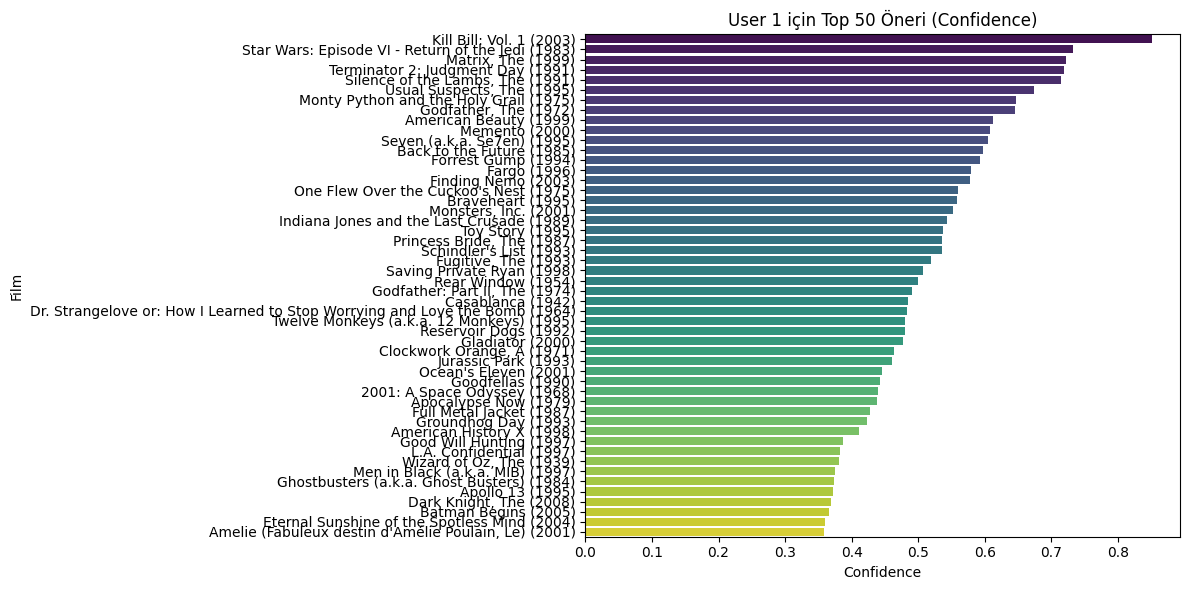

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)


plt.figure(figsize=(12,6))
sns.barplot(
    x='confidence', 
    y='title', 
    data=recommendations,
    palette="viridis"
)
plt.title(f"User {user_id} i√ßin Top 50 √ñneri (Confidence)")
plt.xlabel("Confidence")
plt.ylabel("Film")
plt.tight_layout()
plt.show()


A√ßƒ±klama:

Bu kod √ßalƒ±≈üƒ±nca, userId=1 i√ßin Apriori kurallarƒ±na dayalƒ± top 50 √∂neri listesini g√∂rebildik.

**O zaman ≈üimdi film ID‚Äôlerini isimlere √ßevirip, kurallara dayalƒ± √∂neri fonksiyonunu yazalƒ±m ve √∂rnek √∂neri g√∂relim:**

In [26]:
def recommend_movies_by_title(movie_title, rules_df, movies_df, top_n=5):
    # Film adƒ±nƒ± ID'ye √ßevir
    movie_id = movies_df[movies_df['title']==movie_title]['movieId'].values[0]

    # Kurallarda antecedents i√ßinde movie_id var mƒ±
    filt = rules_df['antecedents'].apply(lambda x: movie_id in x)
    related_rules = rules_df[filt].sort_values(['lift','confidence'], ascending=[False, False])

    if related_rules.empty:
        print(f"‚ö†Ô∏è '{movie_title}' i√ßin kural bulunamadƒ±.")
        return []

    # Consequents (√∂nerilen filmler) ID ‚Üí isim
    recommendations = []
    for _, row in related_rules.iterrows():
        for cons in row['consequents']:
            if cons != movie_id and cons not in recommendations:
                title = movies_df[movies_df['movieId']==cons]['title'].values[0]
                recommendations.append(title)
        if len(recommendations) >= top_n:
            break

    return recommendations[:top_n]

# √ñrnek kullanƒ±m
sample_movie = "Toy Story (1995)"
print(f"'{sample_movie}' izleyenler ≈üunlarƒ± da sevmi≈ü olabilir:")
print(recommend_movies_by_title(sample_movie, rules, movies, top_n=5))


'Toy Story (1995)' izleyenler ≈üunlarƒ± da sevmi≈ü olabilir:
['Toy Story 2 (1999)', 'Monsters, Inc. (2001)', 'Willy Wonka & the Chocolate Factory (1971)', 'Incredibles, The (2004)', 'Finding Nemo (2003)']


‚úÖ Bu fonksiyon ≈üunu yapar:

Toy Story (1995) gibi bir film verirsen, rules i√ßinden antecedent‚Äôlerinde bu filmi barƒ±ndƒ±ran kurallarƒ± bulur.

Lift ve confidence‚Äôa g√∂re sƒ±ralar.

En √ßok √∂nerilen 5 filmi listeler.

üîπ Top 50 √ñneri G√∂rselle≈ütirme (Bubble Chart)

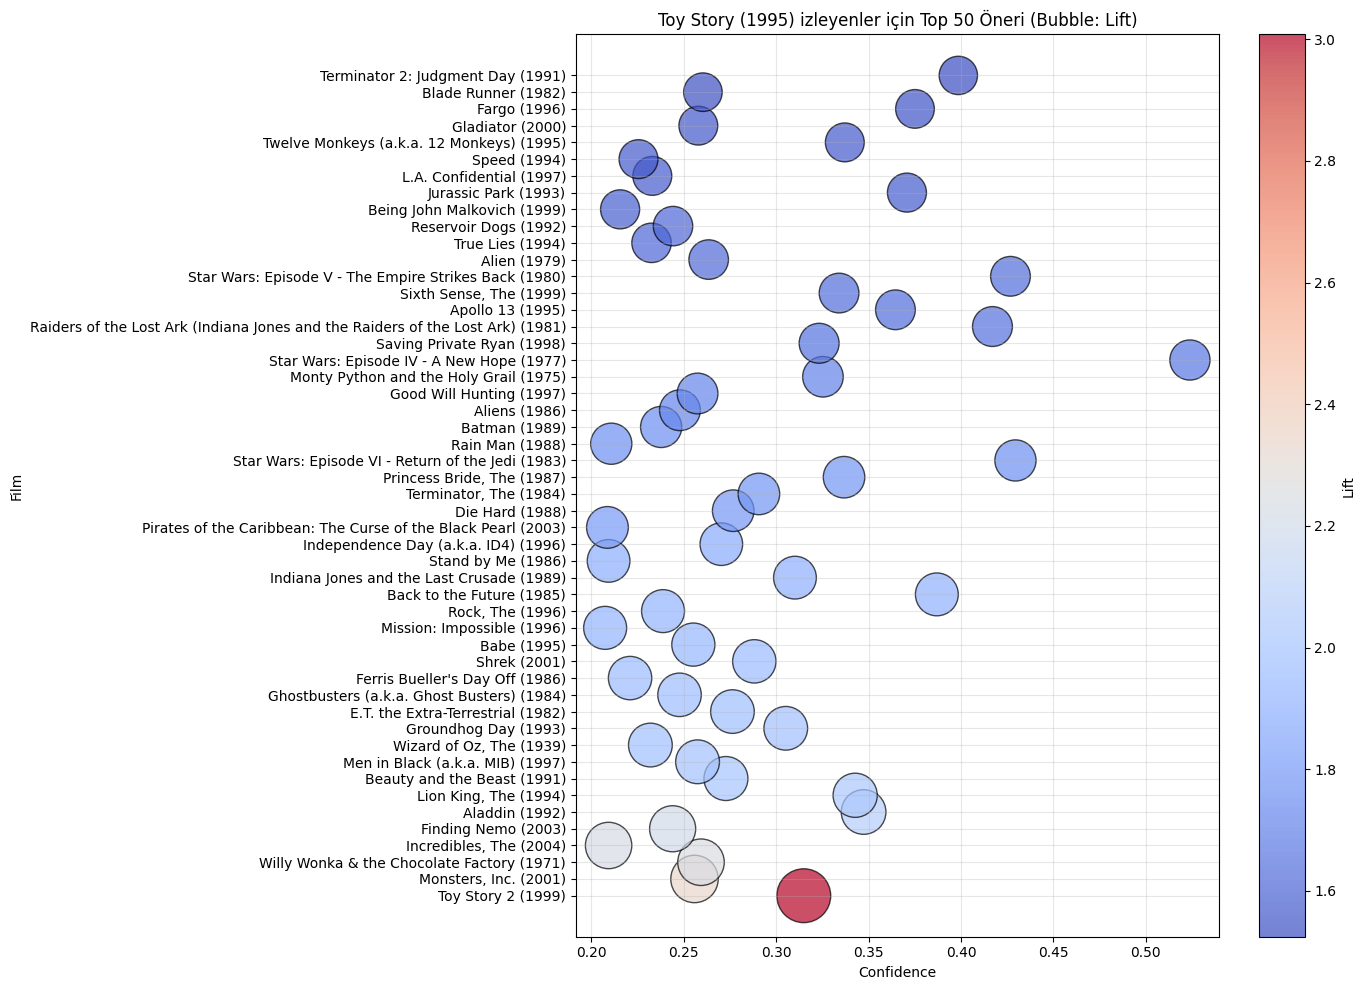

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# √ñnerileri al (top 50)
top_recs = recommend_movies_by_title("Toy Story (1995)", rules, movies, top_n=50)
# Eƒüer confidence ve lift deƒüerlerini g√∂rmek istersen, rules_df'den √ßekip birle≈ütir
def get_conf_lift(recs, rules_df, movies_df, movie_title):
    movie_id = movies_df[movies_df['title']==movie_title]['movieId'].values[0]
    filt = rules_df['antecedents'].apply(lambda x: movie_id in x)
    related_rules = rules_df[filt]
    
    data = []
    for _, row in related_rules.iterrows():
        for cons in row['consequents']:
            if cons != movie_id:
                title = movies_df[movies_df['movieId']==cons]['title'].values[0]
                if title in recs:
                    data.append({
                        'title': title,
                        'confidence': row['confidence'],
                        'lift': row['lift']
                    })
    return pd.DataFrame(data).drop_duplicates(subset='title')

viz_df = get_conf_lift(top_recs, rules, movies, "Toy Story (1995)")

# G√∂rselle≈ütirme
plt.figure(figsize=(14,10))
scatter = plt.scatter(
    x=viz_df['confidence'],
    y=viz_df['title'],
    s=viz_df['lift']*500,          # Bubble boyutu lift ile
    c=viz_df['lift'],               # Renk skalasƒ± lift
    cmap='coolwarm',
    alpha=0.7,
    edgecolors='k'
)

plt.colorbar(scatter, label='Lift')
plt.xlabel('Confidence')
plt.ylabel('Film')
plt.title("Toy Story (1995) izleyenler i√ßin Top 50 √ñneri (Bubble: Lift)")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


A√ßƒ±klama:

Apriori: Kullanƒ±cƒ±nƒ±n izlediƒüi filmlere g√∂re kurallardan √∂neri √ßƒ±karƒ±r.

Collaborative Filtering: Kullanƒ±cƒ± benzerliƒüine g√∂re √∂neri √ßƒ±karƒ±r.

Hybrid: ƒ∞kisini birle≈ütirir, tekrar eden filmleri √ßƒ±karƒ±r ve top N √∂neriyi listeler.

B√∂ylece hem kurallara dayalƒ± hem de kullanƒ±cƒ±-temelli √∂neriyi bir arada alabiliyoruz.

Evet, bu √ßƒ±ktƒ± gayet mantƒ±klƒ± ve beklenen deƒüerler:

ratings_movies boyutu (20000263, 6) ‚Üí 20 milyonun √ºzerinde rating kaydƒ± ve 6 s√ºtun (userId, movieId, rating, timestamp, title, genres)

Filtre sonrasƒ± kullanƒ±cƒ± sayƒ±sƒ± 138287 ‚Üí pop√ºler ve ‚Äúliked‚Äù filmleri filtreledikten sonra h√¢l√¢ 138 bin kullanƒ±cƒ± var, √ßok makul

Filtre sonrasƒ± film sayƒ±sƒ± 7344 ‚Üí en az 50 kullanƒ±cƒ± tarafƒ±ndan izlenmi≈ü pop√ºler filmler, bu da mantƒ±klƒ±

‚úÖ Yani dataset ve filtreler d√ºzg√ºn √ßalƒ±≈üƒ±yor.

üí° √ñzetle Yaptƒ±klarƒ±m:

1. Adƒ±m: Veri temizliƒüi ‚Üí y√ºksek puan + pop√ºler filtre

2. Adƒ±m: Bellek dostu subset olu≈üturma ‚Üí hƒ±zlƒ± test

3. Adƒ±m: One-hot / Sparse matrisi ‚Üí CF + FPGrowth i√ßin

4. Adƒ±m: CF fonksiyonu ‚Üí kullanƒ±cƒ±-temelli √∂neri

5. Adƒ±m: Apriori / FPGrowth ‚Üí kurallara dayalƒ± √∂neri

6. Adƒ±m: Hybrid fonksiyon ‚Üí CF + Apriori birle≈üimi

7. Adƒ±m: TOP-N √ñneri G√∂rselle≈ütirme

**TE≈ûEKK√úRLER...**